In [19]:
import os
import time
import datetime
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [3]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

train = train.rename(columns={'賃料': 'target', '契約期間': 'Contract', '間取り': 'Room',
                              '築年数': 'Passed', '駐車場': 'Parking', '室内設備': 'Facility',
                              '放送・通信': 'Internet', '周辺環境': 'Building', '建物構造': 'Material',
                              '面積': 'Area', 'キッチン': 'Kitchen', '所在地': 'Place',
                              'バス・トイレ': 'Bath', '所在階': 'Floor', 'アクセス': 'Access',
                              '方角': 'Angle'})
test = test.rename(columns={'契約期間': 'Contract', '間取り': 'Room', '築年数': 'Passed',
                            '駐車場': 'Parking', '室内設備': 'Facility', '放送・通信': 'Internet',
                            '周辺環境': 'Building', '建物構造': 'Material', '面積': 'Area',
                            'キッチン': 'Kitchen', '所在地': 'Place', 'バス・トイレ': 'Bath',
                            '所在階': 'Floor', 'アクセス': 'Access', '方角': 'Angle'})

In [6]:
train.head(2)

,id,target,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間


In [35]:
place = train["Place"].str.replace("東京都", "").str.split("区")
place = pd.DataFrame(place.str, index=["Place", "Place2"]).T
# japanse_ward = ['世田谷', '中央', '中野', '北', '千代田', '台東', '品川', '墨田', '大田', '文京',
#                 '新宿', '杉並', '板橋', '江戸川', '江東', '渋谷', '港', '目黒', '練馬', '荒川',
#                 '葛飾', '豊島', '足立']

# english_ward = ["Setagaya", 'Cyuo', 'Nakano', 'Kita', 'Tiyoda', 'Daito', 'Sinagawa', 'Sumida', 'Ota', 'Bunkyo',                          'Sinzyuku', 'Suginami', 'Itabashi', 'Edogawa', 'Eto', 'Shibuya', 'Minato', 'Meguro', 'Nerima', 'Arakawa',                'Katushika', 'Toyoshima', 'Adati']
# for j, e in zip(japanse_ward, english_ward):
#     place["Place"].str.replace(j, e)
place["Place"] = place["Place"].replace({'世田谷': 'Setagaya', '中央': 'Cyuo', '中野': 'Nakano', '北': 'Kita',
                                         '千代田': 'Tiyoda', '台東': 'Daito', '品川': 'Sinagawa', '墨田': 'Sumida',
                                         '大田': 'Ota', '文京': 'Bunkyo', '新宿': 'Sinzyuku', '杉並': 'Suginami',
                                         '板橋': 'Itabshi', '江戸川': 'Edogawa', '江東': 'Eto', '渋谷': 'Shibuya',
                                         '港': 'Minato', '目黒': 'Meguro', '練馬': 'Nerima', '荒川': 'Arakawa',
                                         '葛飾': 'Katushika', '豊島': 'Toyoshima', '足立': 'Adati'})

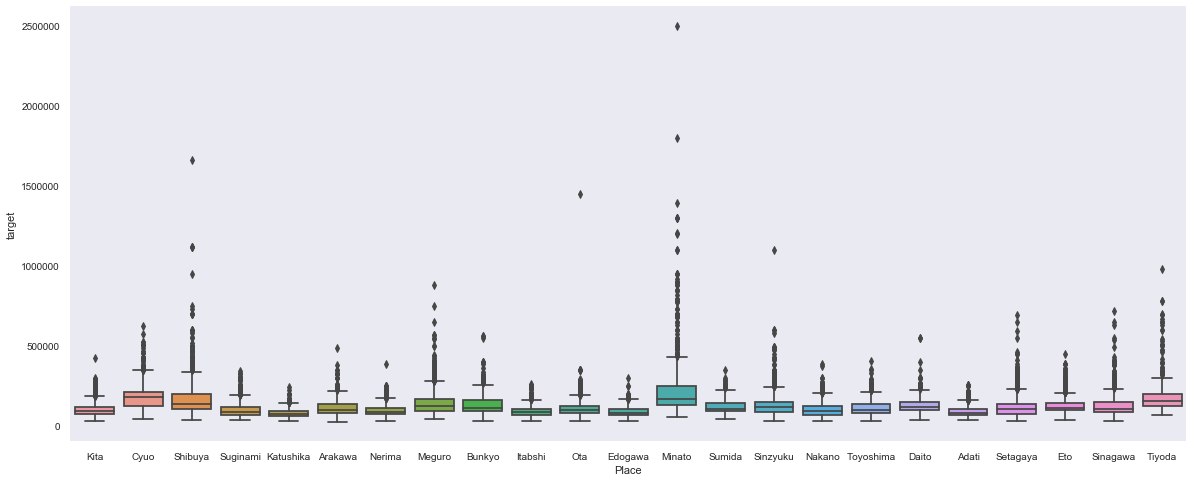

In [36]:
data = pd.concat([train['target'], place["Place"]], axis=1)
fig = plt.figure(figsize=(20, 8))
sns.set_style("dark")
ax = sns.boxplot(x="Place", y="target", data=data)
ax.set_xticks 
plt.show()
# fig.axis(ymin=0, ymax=800000)